In [1]:
%run ../tools/autoipy.py
import numpy as np
import analyze_orbits as anal 
import matplotlib.pyplot as plt

from matplotlib import gridspec


#indepdent draws= number of steps / autocorrelation time (in units of steps)

importing Jupyter notebook from analyze_orbits.ipynb


In [21]:
d=10
dirs = ['data/270day_dec10', 'data/270day_feb10']
ns = [50, 50]

anal.concatenate_truths(dirs)   

stems = ['d'+str(d)+'std', 'd'+str(d)+'mean', 'd'+str(d)+'acc', 'd'+str(d)+'prec',
        'd'+str(d)+'fitted', 'd'+str(d)+'a_posterior_ep0_', 'd'+str(d)+'a_posterior_ep1_', 
        'd'+str(d)+'a_posterior_ep2_', 'd'+str(d)+'ML',]

for stem in stems:
    anal.concatenate_samples(dirs, ns, stem=stem, fend='.dat')



truths shape (50, 6)
truths 0  shape (50, 6)
truths 1  shape (50, 6)
new truths shape (100, 6)
file /home/claire/Dropbox/code/orbits/data/270day_feb10/d10a_posterior_ep0_31.dat not found, skipping...
file /home/claire/Dropbox/code/orbits/data/270day_dec10/d10a_posterior_ep1_35.dat not found, skipping...
file /home/claire/Dropbox/code/orbits/data/270day_dec10/d10a_posterior_ep1_43.dat not found, skipping...
file /home/claire/Dropbox/code/orbits/data/270day_dec10/d10a_posterior_ep1_48.dat not found, skipping...
file /home/claire/Dropbox/code/orbits/data/270day_feb10/d10a_posterior_ep1_49.dat not found, skipping...


reading 1 sigma result from data/30day_dec10
median prec [ 0.45749051  0.16        0.12261729  0.0784543   0.0495576 ]


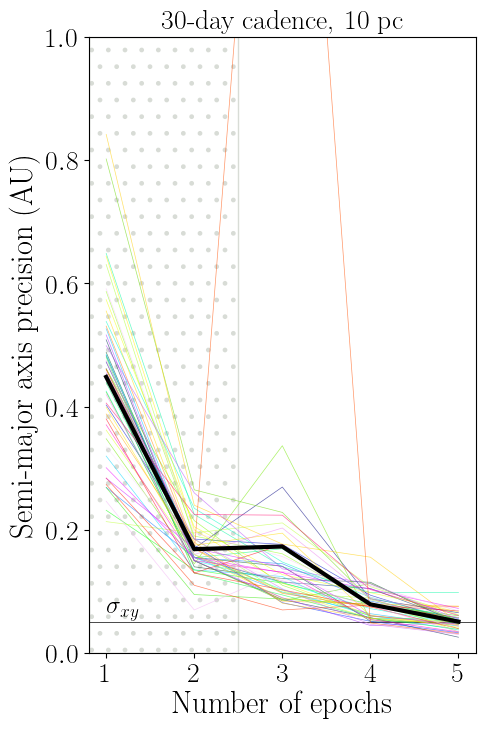

In [19]:
# DIMINISHING RETURNS
n_ep=5


d=10
idim=0
ndims=6
cadence=30

n_it=50
i_hide=[]
# i_hide = [7, 16, 17] # 20pc 1st miss
# i_hide=[31, 42, 47] # uniform true dec (5th epoch not converged)
# i_hide=[31, 42] # uniform dec (high e)
# i_hide=[19, 20, 34] # 30 day dec


# i_hide = [31] # 270 day feb (31: first epoch nondet)
# i_hide = [7, 14] # 180 day feb (14: first epoch nondet)
# i_hide = [7, 19, 27, 40] # 20 pc feb

# i_hide = [3, 19, 35] # 90 day master
# i_hide = [7+50, 14+50] # 180 day master (14: first epoch nd)
# i_hide = [31+50, 3+50] # 270 day master (31: first epoch nd, 3: one fucker stuck)
# i_hide = [31, 42, 26+50] # uniform master
# i_hide=[31, 42, 47] # uniform true master
# i_hide = [19, 7, 16, 17, 24, 35, 36, 41, 6+50, 7+50, 19+50, 27+50, 40+50, 41+50] # 20 pc master

# i_hide = np.arange(20)


sigma=1

direc = 'data/30day_dec10'
# direc = 'data/180day_dec10_joined'

y_data_dims = anal.read_retrievals(direc, n_ep, n_it, ndims, d, iter_start=0, sigma=sigma) # (n_iter, ndims, n_epoch, 3)
y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]

# n_it=4
fig, ax = anal.plot_diminishing_returns(y_data_thisdim, n_ep, n_it, idim=0, s=5, d=d, direc=direc,
                        alpha=0.6, lw=0.5, 
#                                         showguide=True,
                                        iter_start=0,ylog=False, 
                                    ylim=[0, 1], read=True,
                                    legtitle=[],
                                        n_datasets=1,
                                        showlegend=False,
                                i_hide=i_hide,
                            figsize=(5,8),
#                                         title='Beta eccentricities',
#                                         title='Uniform eccentricities',
#                                     title='Uniform true eccentricities\nwith Beta prior'
                                    
                                    title=str(cadence)+'-day cadence, '+str(d)+' pc'
                        )

# fig.savefig('diminishing_returns_uniformtrue.pdf', bbox_inches='tight')

reading 1 sigma result from data/90day_dec4
median acc [  2.62803550e-02   2.50000000e-02   1.39300998e-02   2.73771317e-04
  -4.54172941e-05]


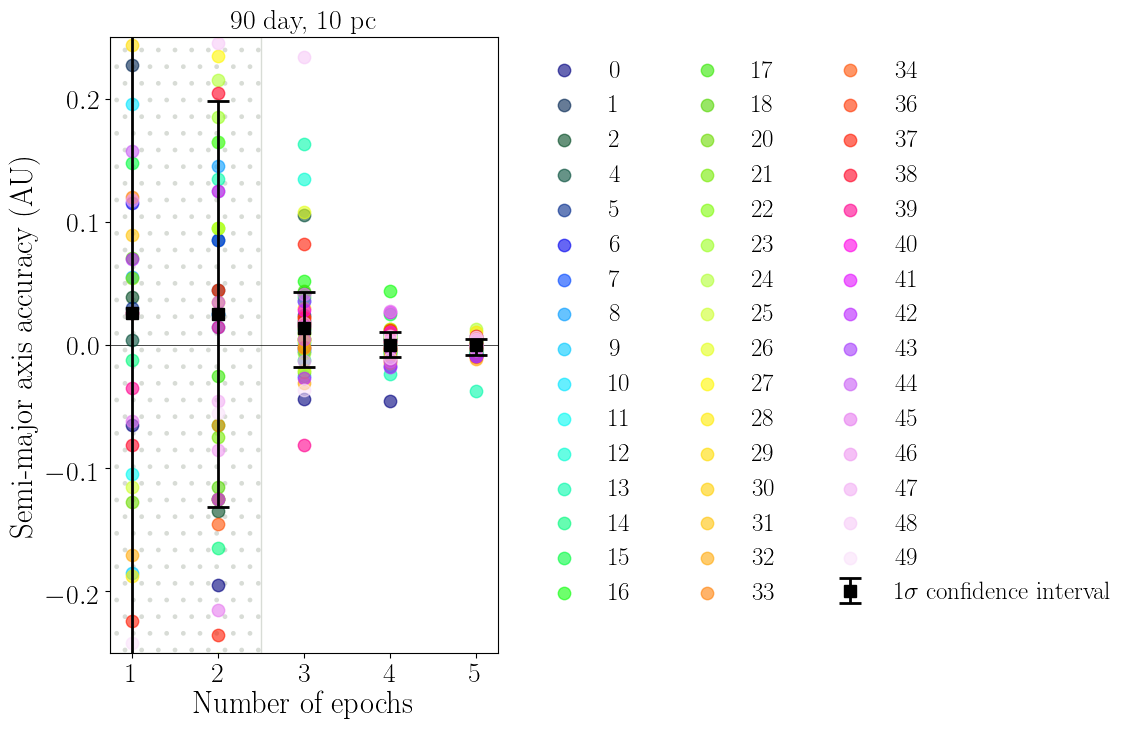

In [4]:
# plot one dataset with all runs showing accuracy

sigma=1
cad=90

n_it=50
n_ep=5
i_dim=0
ndims=6

direc = 'data/90day_dec4'

i_hide=[]
# i_hide=[7, 19, 27, 40, 41] # 20 pc feb
# i_hide = [19, 7, 16, 17, 24, 35, 36, 41, 6+50, 7+50, 19+50, 27+50, 40+50, 41+50] # 20 pc master
i_hide = [3, 19, 35] # 90 day master

# i_hide=np.arange(90)

dims = [0]
ds = [10]
truths = anal.read_truths(direc)


# need to convert median retrievals to accuracy

for d in ds:
    for idim in dims: 
        y_data_dims = anal.read_retrievals(direc,n_ep, n_it, ndims, d, sigma=sigma) # (n_iter, ndims, n_epoch, 3)
        y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
        fig, ax = anal.plot_scatter_epochs(y_data_thisdim, n_ep, n_it, idim, truths, direc=direc, 
                                           d=d,
                                       title=str(cad)+' day, '+str(d)+' pc', 
                                           sigma=sigma,
#                                         a_fixed=None, HZ_cmap=HZ_cmap, 
                                           ylim=[-0.25, 0.25],
#                                        HZ_inner=HZ_inner, HZ_outer=HZ_outer, 
#                                        HZ_labels=HZ_labels,
                                           i_hide=i_hide,
                                        figsize=(5,8),
                                       maxprob=False, read=True,
                                           showguide=True,
#                                         showlegend=True, 
                                           slides=False, alpha=0.6)
        
fig.savefig('dec10.pdf', bbox_inches='tight')

reading 1 sigma result from data/90day_feb10

i= 23 /n retrieved a= [[[ 1.03976138  1.19269867  1.52937248]
  [ 0.96499963  1.12451961  1.24893227]
  [ 1.09541725  1.1534376   1.2603131 ]
  [ 1.03074069  1.04207244  1.05421158]
  [ 1.03041604  1.04126544  1.05282608]]]


 (24, 6, 5, 3) 


s_AU 0.05
truths:  1.04363849526 1.44450927015 0.0987473508564 0.54059558354 3.13777333954 3.07791406211
   2 fits:  1.12794747329 1.47759536157 1.02303218845e-06 0.540315163181 4.17538434115 2.06408543142
   3 fits:  1.04150569319 1.45277859928 0.0848819694045 0.544529397746 2.93170837371 3.23720680402
   4 fits:  1.04061330913 1.44507005463 0.0944361809887 0.536045110544 3.18074453027 2.99751273669
a_proj [ 1.13451441  0.35876229  0.92967234  0.38409452  1.02335434]
reading /home/claire/Dropbox/code/orbits/data/90day_feb10/d10a_posterior_ep0_23.dat
reading /home/claire/Dropbox/code/orbits/data/90day_feb10/d10a_posterior_ep1_23.dat
i_ep 2
nsteps 599999
samples 1dim (599999,)
1-sigma half-width in lin

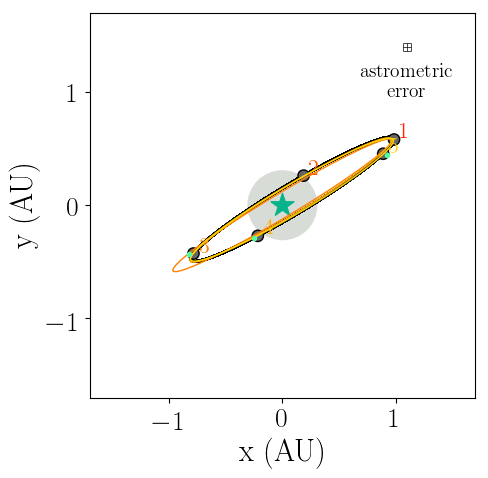

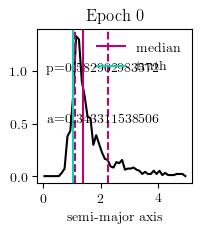

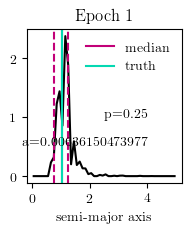

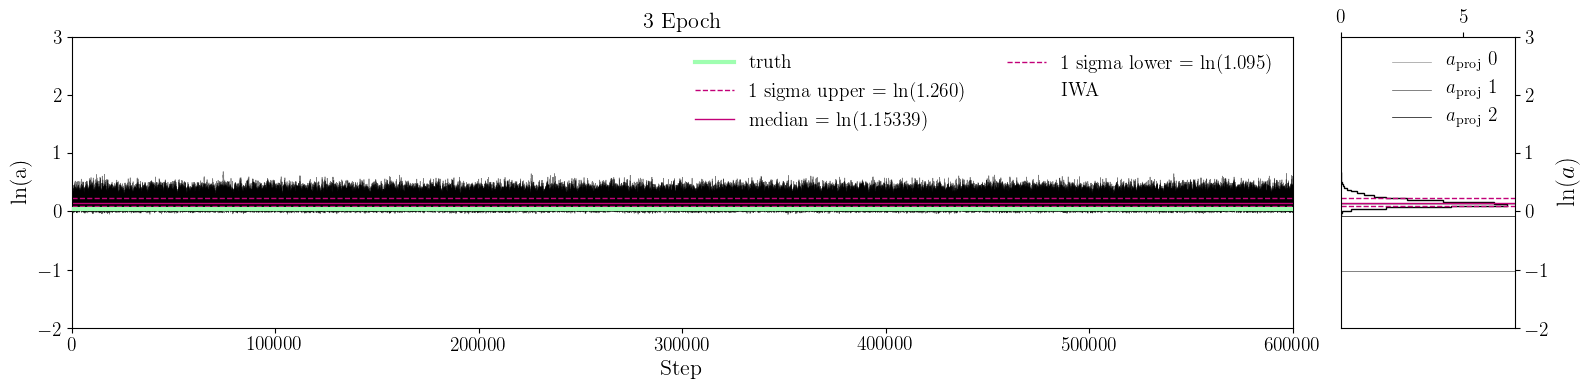

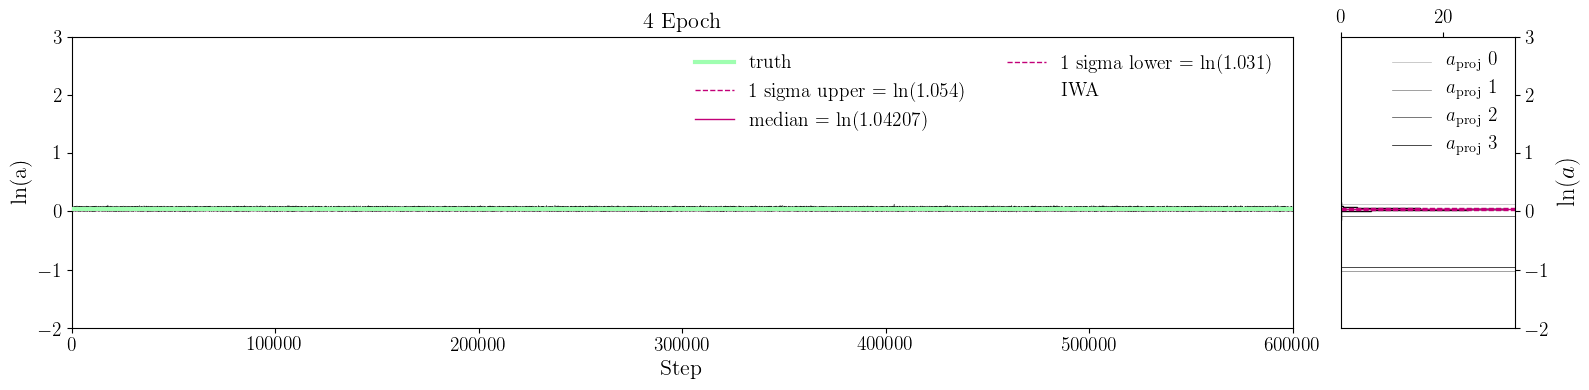

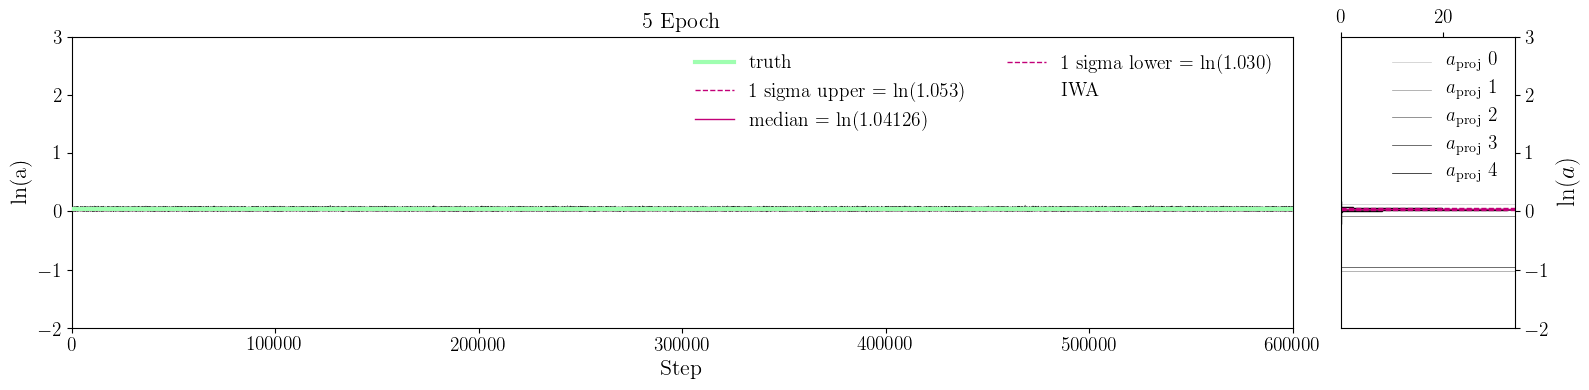

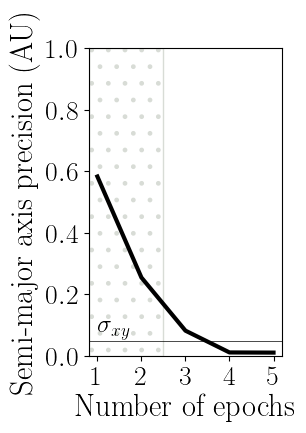

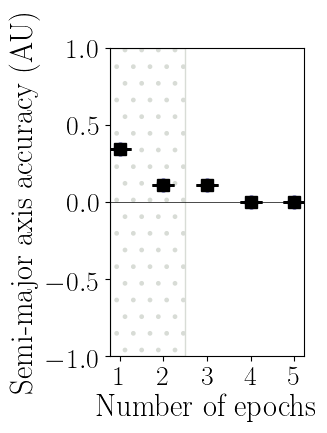

In [3]:
# testing

direc='data/90day_feb10'
i_it=23
cadence=90
d=10
ecc_dist='Beta'

# print uncertainties from each i_it
anal.diagnostic_plots(direc, i_it, ecc_dist=ecc_dist, d=d, cadence=cadence, n_it_tot=i_it+1, maxprob=False,
                     showML=False, nwalkers=20, nsteps=6e5)

In [14]:
# z scores



direc='data/90day_dec4_joined'
idim=0
n_it=100
n_ep=5
d=10

print('beta')
for i_ep in range(2, n_ep):
    print('epoch', i_ep)
    zscores, zscore_mean, zscore_std = anal.get_zscore(direc, n_it, i_ep, idim, d, maxprob=True,
                                                      i_hide=[3, 19, 35])

    print('   mean', '{:05.2f}'.format(zscore_mean))
    print('   std', '{:05.2f}'.format(zscore_std))

print('\nuniform')
    
direc='data/uniform_nov20_joined'
for i_ep in range(2, n_ep):
    print('epoch', i_ep)
    zscores, zscore_mean, zscore_std = anal.get_zscore(direc, n_it, i_ep, idim, d, maxprob=True,
                                                      i_hide=[31, 42, 26+50])

    print('   mean', '{:05.2f}'.format(zscore_mean))
    print('   std', '{:05.2f}'.format(zscore_std))
    
print('\nmixed')
    
direc='data/uniformtrue_dec10_joined'
for i_ep in range(2, n_ep):
    print('epoch', i_ep)
    zscores, zscore_mean, zscore_std = anal.get_zscore(direc, n_it, i_ep, idim, d, maxprob=True,
                                                       i_hide=[31, 42, 47]
                                                )

    print('   mean', '{:05.2f}'.format(zscore_mean))
    print('   std', '{:05.2f}'.format(zscore_std))

beta
epoch 2
reading 1 sigma result from data/90day_dec4_joined
n_it= 97
   mean -0.47
   std 01.19
epoch 3
reading 1 sigma result from data/90day_dec4_joined
n_it= 97
   mean -0.10
   std 00.99
epoch 4
reading 1 sigma result from data/90day_dec4_joined
n_it= 97
   mean 00.15
   std 01.12

uniform
epoch 2
reading 1 sigma result from data/uniform_nov20_joined
n_it= 97
   mean -0.18
   std 01.26
epoch 3
reading 1 sigma result from data/uniform_nov20_joined
n_it= 97
   mean -0.14
   std 01.11
epoch 4
reading 1 sigma result from data/uniform_nov20_joined
n_it= 97
   mean -0.13
   std 01.10

mixed
epoch 2
reading 1 sigma result from data/uniformtrue_dec10_joined
n_it= 97
   mean -1.02
   std 02.56
epoch 3
reading 1 sigma result from data/uniformtrue_dec10_joined
n_it= 97
   mean -0.28
   std 02.59
epoch 4
reading 1 sigma result from data/uniformtrue_dec10_joined
n_it= 97
   mean 00.23
   std 04.11


In [10]:
C = np.loadtxt(fname='cmap.txt')
import matplotlib as mpl # in python
cm = mpl.colors.ListedColormap(C/255.0)

reading 1 sigma result from data/uniformtrue_dec10_joined
median acc [ 0.03891833  0.12720277  0.05569993  0.0106885   0.00054165]


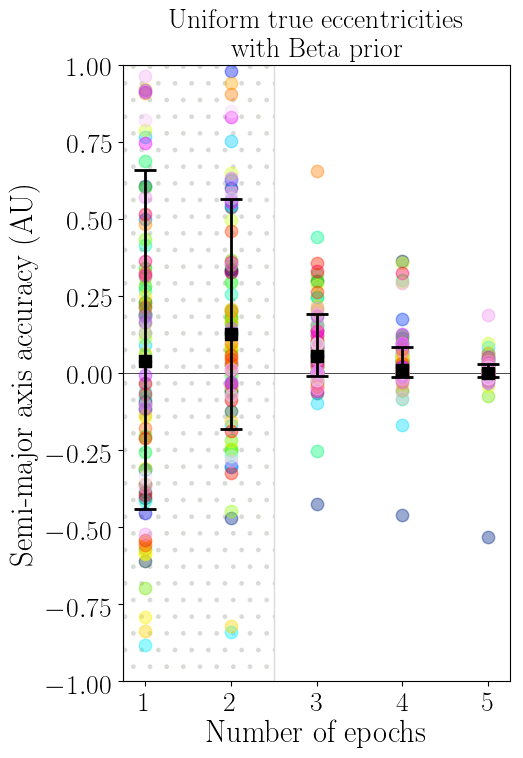

In [13]:
# make scatter plot of dim accuracy

cad=90
n_ep=5

ndims=6
a_fixed=None
direc = 'data/uniformtrue_dec10_joined'
dims = range(1)
ds = [10]
truths = anal.read_truths(direc)

sigma=1
n_it=100
i_hide=[]
# i_hide = list(range(20))

# i_hide=[31, 42, 47] # uniform true (5th epoch not converged)
# i_hide=[31, 42] # uniform (high e)
# i_hide = [7, 16, 17, 24, 35, 36, 41] # 20 pc dec

# i_hide = [3, 19, 35] # 90 day master
i_hide=[31, 42, 47] # uniform true master
# i_hide = [31, 42, 26+50] # uniform master
# i_hide = [3, 31] # 270 day feb
# i_hide = [7, 14] # 180 day feb (14: first epoch nondet)
# i_hide = [19] # 20 pc feb




# need to convert median retrievals to accuracy

for d in ds:
    for idim in dims: 
        y_data_dims = anal.read_retrievals(direc,n_ep, n_it, ndims, d,
                                          iter_start=0, sigma=sigma
                                          ) # (n_iter, ndims, n_epoch, 3)
        y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]

        fig, ax = anal.plot_scatter_epochs(y_data_thisdim, n_ep, n_it, idim, truths, d=d, direc=direc, 
                                       title='Uniform true eccentricities\nwith Beta prior', 
#                                            title='Uniform eccentricities',
#                                            title='Beta eccentricities',
#                                            title=str(d)+' pc, '+str(cad)+' day',
                                           maxprob=False,
                                           #showguide=True,
                                       iter_start=0,sigma=sigma,ylim=[-1, 1],
                                       i_hide=i_hide, 
                                           read=True,
#                                            showylabel=False,
#                                            precisionbounds=True,
#                             a_fixed=0,
#                                            HZ_cmap="PuRd", 
#                             HZ_inner=HZ_inner, HZ_outer=HZ_outer, HZ_labels=HZ_labels,
#                                            HZ_lines=None, HZ_inner=None, HZ_outer=None, HZ_labels=None,
                            datalabel=None,conc_direcs=False,figsize=(5,8),
                            plotIWA=False, 
                                           showlegend=False, 
                                           slides=False, alpha=0.4, offset=None)
        
        fig.savefig('scatter_'+str(sigma)+'sigma_'+str(idim)+'uniformtrue.pdf', bbox_inches='tight')


reading 1 sigma result from data/ET_dec11_joined
median acc [ 1.07009678  0.985       1.00712665  0.99863035  0.99880539]


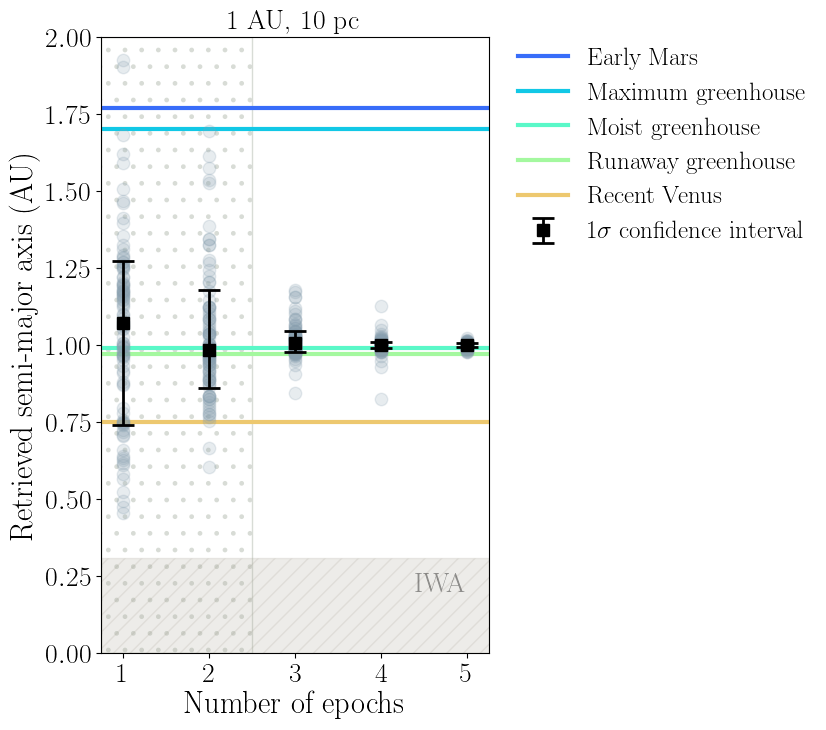

In [4]:
# make scatter plot of dim accuracy for earth twins

HZ_labels=['Early Mars', 'Maximum greenhouse', 'Moist greenhouse', 'Runaway greenhouse', 'Recent Venus',]
HZ_lines = [1.77, 1.7, 0.99, 0.97, 0.75, ] # Kopperapu 2013

# anal.concatenate_truths(['data/ET_nov11', 'data/ET_nov11_pt2'])          
# anal.concatenate_samples(['data/ET_nov11', 'data/ET_nov11_pt2'],n_iters=20,stem='d10ML',fend='.dat')


a_fixed= 1


# HZ_scale=np.array([0.01, 0.05, 0.1, 0.25, 0.5])
# HZ_labels=['1\% HZ', '5\% HZ', '10\% HZ', '25\% HZ', '50\% HZ']
HZ_cmap='rainbow'#'spring'


HZ_inner = a_fixed-a_fixed*HZ_scale
HZ_outer= a_fixed+a_fixed*HZ_scale

sigma=1
d=10
cad=90

n_it=100
n_ep=5
i_dim=0
ndims=6
a_fixed=1
direc = 'data/ET_dec11_joined'
i_hide=[34, 37] # ET dec 11
i_hide=[]
# i_hide=np.arange(40)

dims = [0]
ds = [10]
truths = anal.read_truths(direc)


# need to convert median retrievals to accuracy

for d in ds:
    for idim in dims: 
        y_data_dims = anal.read_retrievals(direc,n_ep, n_it, ndims, d, sigma=sigma) # (n_iter, ndims, n_epoch, 3)
        y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
        fig, ax = anal.plot_scatter_epochs(y_data_thisdim, n_ep, n_it, idim, truths, direc=direc, 
                                       title='1 AU, 10 pc', sigma=sigma,
                                        a_fixed=1, HZ_cmap=HZ_cmap, ylim=[0, 2],
                                        HZ_lines=HZ_lines, 
#                                        HZ_inner=HZ_inner, HZ_outer=HZ_outer, 
                                       HZ_labels=HZ_labels,
                                           i_hide=i_hide,
                                        figsize=(5,8),
                                       maxprob=False, read=True,
#                                            showguide=True,
                                        plotIWA=True, showlegend=True, slides=False, alpha=0.2, 
                                           alphaHZ = 0.6, offset=None)
        
        fig.savefig('scatter_ET_rk.pdf', bbox_inches='tight')

reading 1 sigma result from data/30day_dec10
reading 1 sigma result from data/90day_dec4_joined
reading 1 sigma result from data/180day_dec10_joined
reading 1 sigma result from data/270day_dec10_joined


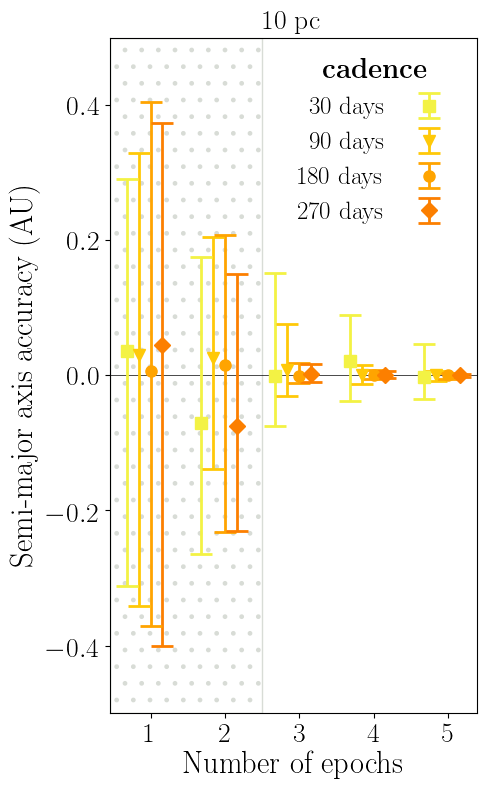

In [24]:
import matplotlib.pyplot as plt
# compare different cadences


direc=['data/30day_dec10', 'data/90day_dec4_joined',  'data/180day_dec10_joined', 'data/270day_dec10_joined']
datalabel=['30 days', '90 days', '180 days', '270 days']

cmaps=['Wistia', 'RdPu', 'summer_r', 'pink_r', 'bone_r', 'copper_r']

idim=0
n_ep=5
n_it=[50, 100, 100, 100]
# i_hide = [3, 19, 35] # 90 day master
# i_hide = [7+50, 14+50] # 180 day master (14: first epoch nd)
# i_hide = [31+50, 3+50] # 270 day master (31: first epoch nd, 3: one fucker stuck)
i_hide = [[19, 24], [3, 19, 35], [24, 7+50, 14+50], [31+50, 3+50]]

d=10
ndims=6

y_data=[]
for ii, val in enumerate(direc):
    n_it_this = n_it[ii]
    y_data_dims = anal.read_retrievals(val,n_ep, n_it_this, ndims, d, iter_start=0) # (n_iter, ndims, n_epoch, 3)
    #  read_retrievals(direc, n_ep, n_it, ndims, d)
    y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
    y_data.append(y_data_thisdim)

    
    
# plot 
fig, ax = anal.plot_scatter_epochs(y_data, 5, n_it, idim=idim, truths=None, d=d, direc=direc, 
                                   n_datasets=len(direc),
                                                            fname_base=None, datalabel=datalabel,
                                                            plotIWA=False, slides=False, offset=0.16,
                                                            ylim=[-0.5, 0.5], showxlabel=True,
                             maxprob=False, read=True,
                             i_hide = i_hide,
#                                precisionbounds=True,
#                                HZ_inner=HZ_inner, HZ_outer=HZ_outer, HZ_labels=HZ_labels, a_fixed=0,
                                           iter_start=0, alpha=0.8,figsize=(5,8),
                               title=str(d)+' pc',
                                                            cmap=cmaps[idim], legtitle=r"$\bf{cadence}$",
                            
                                                               )
plt.tight_layout()
fig.savefig('x-cadences'+str(idim)+'.pdf', bbox_inches='tight')



reading 1 sigma result from data/30day_dec10
reading 1 sigma result from data/90day_dec4_joined
reading 1 sigma result from data/180day_dec10_joined
reading 1 sigma result from data/270day_dec10_joined


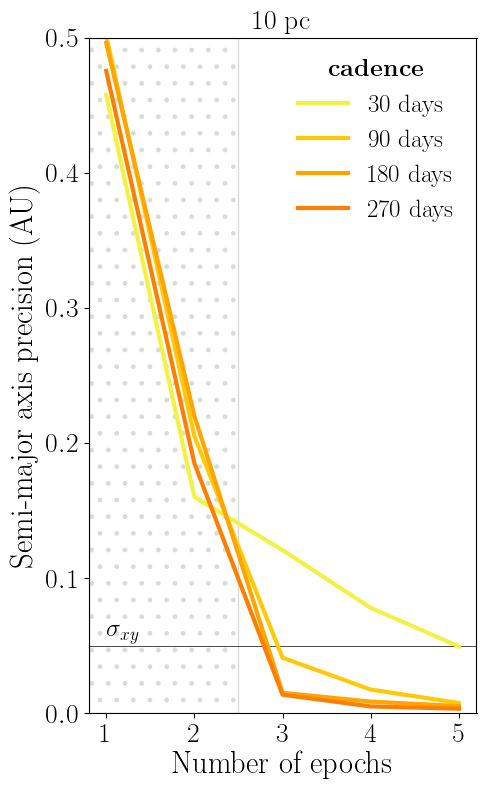

In [25]:
import matplotlib.pyplot as plt

direc=['data/30day_dec10', 'data/90day_dec4_joined', 'data/180day_dec10_joined', 'data/270day_dec10_joined',]
# direc=['data/30day_feb10', 'data/90day_feb10', 'data/180day_feb10', 'data/270day_feb10',]
datalabel=['30 days', '90 days', '180 days', '270 days']
# direc=['data/90day_nov17', 'data/uniform_nov17', 'data/uniformtrue_nov17']
# datalabel=['Rayleigh', 'uniform', 'mixed']
cmaps=['Wistia', 'RdPu', 'summer_r', 'pink_r', 'bone_r', 'copper_r']
n_it=[50, 100, 100, 100]

# i_hide = [[19, 24], [19, 24], [19, 24], [19, 24]] # dec
# i_hide = [[], [], [7], []] # feb

i_hide = [[19, 24], [3, 19, 35], [24, 7+50, 14+50], [31+50, 3+50]] # master
idim=0

d=10


ndims=6
n_ep=5

y_data=[]
for ii, val in enumerate(direc):
    n_its = n_it[ii]
    y_data_dims = anal.read_retrievals(val,n_ep, n_its, ndims, d, iter_start=0) # (n_iter, ndims, n_epoch, 3)
    #  read_retrievals(direc, n_ep, n_it, ndims, d)
    y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
    y_data.append(y_data_thisdim)
    
fig, ax = anal.plot_diminishing_returns(y_data, n_ep, n_it, idim,  s=5, d=d, direc=direc,
                                    n_datasets=len(direc),labels=datalabel,cmap=cmaps[idim],
                        alpha=1, showguide=False, iter_start=0,showxlabel=True,
                        ylim=[0, 0.5], read=True,
                              legtitle=r"$\bf{cadence}$",
                        i_hide = i_hide,
                        figsize=(5,8),title=str(d)+' pc', 
                        )



plt.tight_layout()
fig.savefig('precision.pdf', bbox_inches='tight')

reading 1 sigma result from data/90day_5pc_dec10_joined
reading 1 sigma result from data/90day_dec4_joined
reading 1 sigma result from data/90day_20pc_dec10_joined
n_iters (3,)
i_hide (3,)
i_hide[0] []
0
n_iters 100
i_hide []
direc data/90day_5pc_dec10_joined
1
n_iters 100
i_hide [3, 19, 35]
direc data/90day_dec4_joined
2
n_iters 100
i_hide [19, 7, 16, 17, 24, 35, 36, 41, 56, 57, 69, 77, 90, 91]
direc data/90day_20pc_dec10_joined
a_IWA 0.262987875
a_IWA 0.52597575
a_IWA 1.0519515
f obscured: [0.02, 0.116, 0.672]


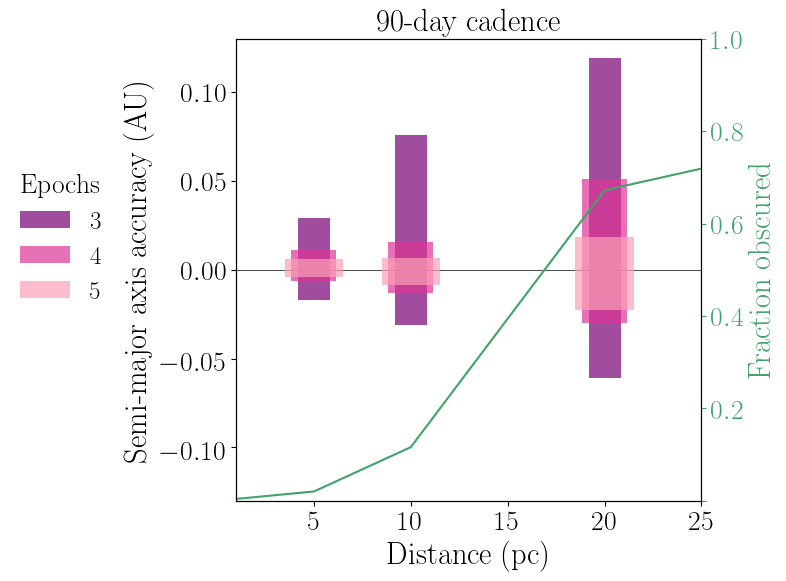

In [3]:
n_it=[100, 100, 100]
idim=0
n_ep=5
ndims=6
cadence=90
direcs=['data/90day_5pc_dec10_joined', 'data/90day_dec4_joined', 'data/90day_20pc_dec10_joined']
y_data_d=[]
distances = [5, 10, 20]

# i_hide = [[], [3, 19], [19, 7, 16, 17, 24, 35, 36, 41]] # dec
# i_hide = [[], [], [7, 19, 27, 40, 41]] # feb

i_hide = [[], [3, 19, 35], [19, 7, 16, 17, 24, 35, 36, 41, 6+50, 7+50, 19+50, 27+50, 40+50, 41+50]] # master

# fname_base = 'samples_epochs'
for ii, val in enumerate(distances):
    y_data_dims = anal.read_retrievals(direcs[ii], n_ep, n_it[ii], ndims, val) # (n_iter, ndims, n_epoch, 3)
    #  read_retrievals(direc, n_ep, n_it, ndims, d)
    y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
    y_data_d.append(y_data_thisdim)
    
fig = anal.plot_accuracy_distance(y_data_d, distances, n_it, n_ep, idim, direcs, slides=False, 
                                  read=True, 
                                  i_hide_list = i_hide,
                                  ylims=[-0.13, 0.13],cadence=cadence,title='90-day cadence',
                           a_fixed=None,  ep_start=2, maxprob=False, figsize=(6,6), #grid=True
                                 )

fig.savefig('distance_90.pdf', bbox_inches='tight')


reading file data/90day_20pc_feb10/d20chains_epochs1.dat
chains_epochs (5,)
chains (120, 200000, 6)
samples (298560, 6)
samples_epochs (1, 298560, 6)
y_data (298560, 6)
[[  1.13585368e-01  -1.49185550e-03   2.76982707e-02   3.01672211e+00
    2.27908430e+00   9.64109808e-01]
 [ -1.50209314e-02  -1.02651707e-01   2.94301906e-02   3.01171428e+00
    1.55901059e+00   1.37260635e+00]
 [  7.68183309e-03  -1.79919029e-04   1.84527552e-01   3.07005679e+00
    1.87139303e+00   1.43981889e+00]
 ..., 
 [  5.12878821e-02  -2.83674629e-01   3.53101134e-02   2.89808793e+00
    1.68611722e+00   1.28199700e+00]
 [  2.73266677e-02  -3.99807351e-01   2.20594921e-02   2.90918439e+00
    2.53778279e+00   5.19314431e-01]
 [ -2.98337256e-02  -4.28188197e-01   2.60971686e-03   2.93153728e+00
    1.88123195e+00   1.11262667e+00]]
y_data_dims (298560,)
sma_MCMC (298560,)
sma_semianal (1000,)


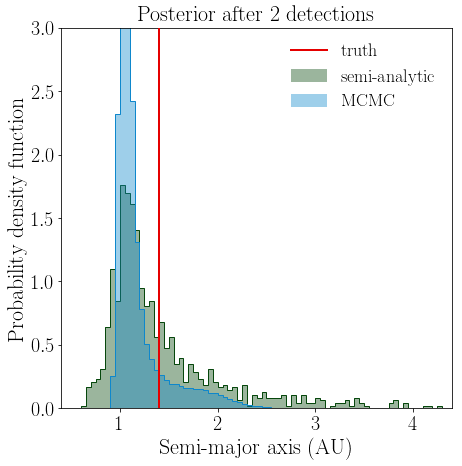

In [3]:
# compare a posterior from semi-analytic and MCMC
d=20
direc='data/90day_20pc_feb10'
i_it=1
fig = anal.semianalytic_compare(direc, i_it, d, idim=0, i_ep=2, nbins=80, thin_mc=80 # 40000
                                , ylim=3,
                               stitle='Posterior after 2 detections')

fig.savefig('a_post_compare2.pdf', bbox_inches='tight')


reading file data/testcmp_feb10/d10chains_epochs0.dat
[[ 0.6023005  -0.08303511  0.28060356  1.92527968  0.77653501  2.50078557]
 [ 1.82581648  0.02477847  0.51173413  1.78437707  0.46628443  3.51202312]
 [ 0.90930207  0.0459805   0.38159502  1.79971562  0.12003849  3.42240307]
 ..., 
 [ 1.96701722  0.01193867  0.35026342  1.74568571  0.57725264  3.6369455 ]
 [ 0.28405656  0.0524593   0.01468087  1.83582443  2.7496894   0.23721186]
 [ 0.34200375  0.02158114  0.03948457  1.83324605  1.57321011  1.54590399]]
sma_MCMC (520,)


FileNotFoundError: [Errno 2] No such file or directory: 'data/testcmp_feb10/d10a_posterior_ep1_0.dat'

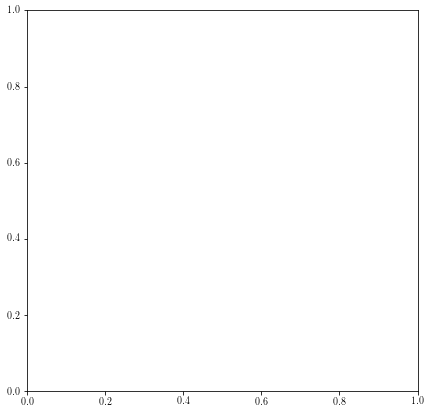

In [2]:
# compare a posterior from semi-analytic and MCMC
d=10
direc='data/testcmp_feb10'
i_it=0
fig = anal.semianalytic_compare(direc, i_it, d, idim=0, i_ep=1, nbins=80, thin_mc=40000
                                , ylim=3,
                               stitle='Posterior after 2 epochs')

# fig.savefig('a_post_compare2.pdf', bbox_inches='tight')


chains_epochs (5,)
samples_epochs (1, 1080, 6)
y_data (1080, 6)
y_data_dims (1080,)
sma_MCMC (1080,)
sma_semianal (1000,)


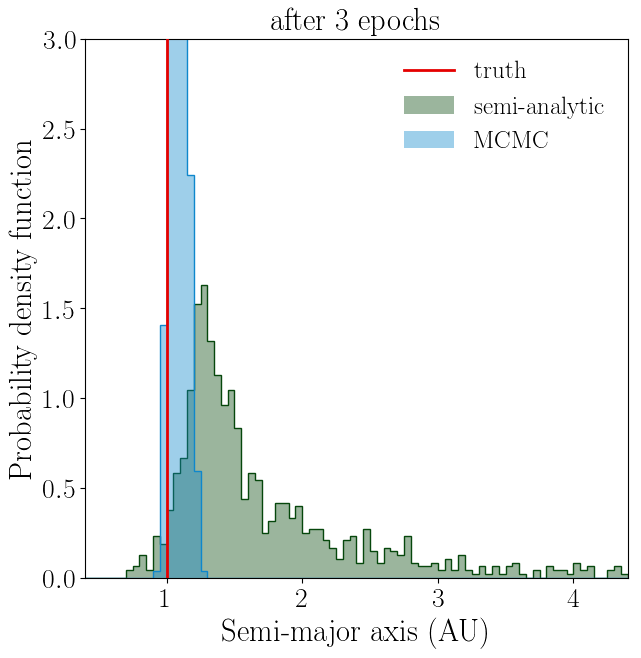

In [43]:
# compare a posterior from semi-analytic and MCMC
d=10
direc='data/90day_dec4'
fig = anal.semianalytic_compare(direc, i_it, d, idim=0, i_ep=2, nbins=80, thin_mc=40000, ylim=3,
                               stitle='Posterior after 3 epochs')

fig.savefig('a_post_compare.pdf', bbox_inches='tight')


s_AU 0.1
truths:  1.0 1.03164144423 0.319545503382 3.01015712114 3.07158117271 1.59711037556
   0 fits:  0.87206761393 1.19424316646 0.00145690561408 1.6130502334 2.02363087767 3.56023959756
   1 fits:  1.68161815309 1.1569304064 0.000907784974973 3.4555942609 4.20511890732 0.272191164538
   2 fits:  1.01985275124 0.869425702318 0.0731487034736 2.79816296444 3.28427325824 1.49603303948
   3 fits:  0.975238760301 0.91806694268 0.268160712919 2.97370506988 3.22429410802 1.45330690373


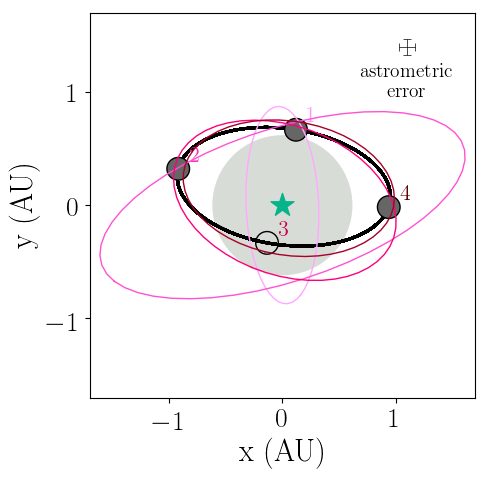

In [11]:
# 20 pc iters for demo: 4, 12 (15!)


# direc='data/demo_dec10'
# i_it=15
d=20

direc = 'data/90day_20pc_dec10'
i_it=9

n_ep=5
cadence=90
truths = anal.read_truths(direc)[i_it]
lna, cosi, ecc, omega_p, xi_0, lan = truths
omega_p = omega_p + np.pi
lan = lan + np.pi
ep2show = range(4)
cmap=cm #'autumn'

fig, ax = anal.show_orbit(truths=[lna, cosi, ecc, omega_p, xi_0, lan], epochs_to_show=ep2show, 
                          cadence=cadence, d=d, s_mas=5, 
                          showplane=False,#lims=[-3, 3],
                          lims=[-1.7, 1.7],
               showIWA=True, savefig=False, showaxes=False, cmap=cmap)
fig, ax = anal.overplot_orbit_fits(fig, ax, direc, showerr=True, epochs_tot=n_ep, i_iter=i_it, d=d, 
#                                    showobvs=True,
                                   epochs_to_show=ep2show, lw=1, cmap=cmap, 
                                   maxprob=True, cadence=cadence)
fig.savefig('orbit_demo.pdf', bbox_inches='tight')

reading 1 sigma result from data/ET_dec11
median acc [ 1.1153429   0.99        1.01598121  1.00036927  0.99877561]


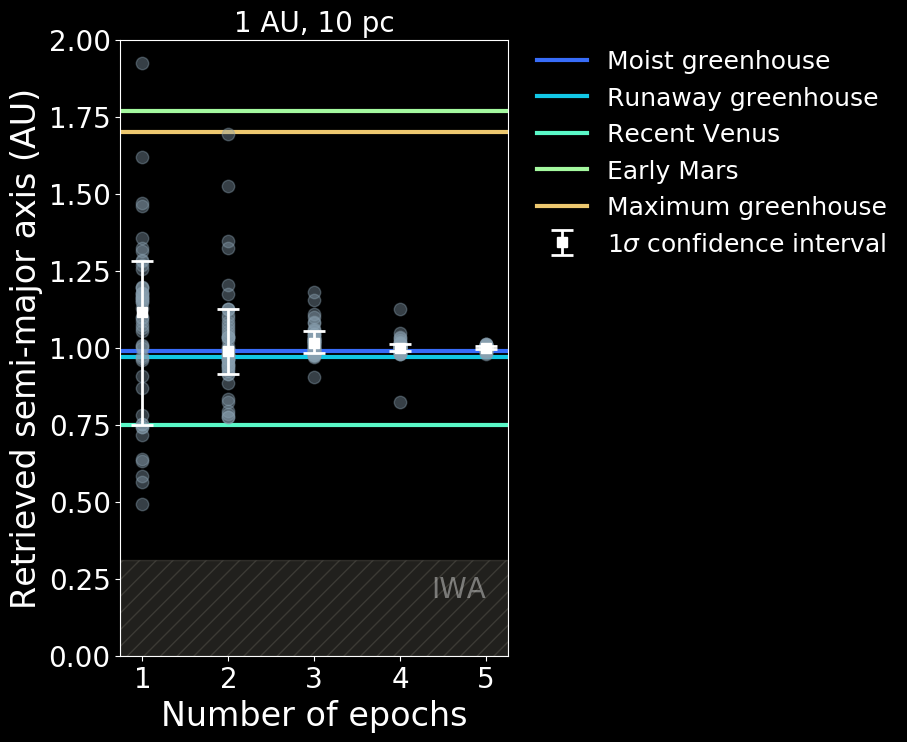

In [2]:
# make scatter plot of dim accuracy for earth twins - slides version

HZ_labels=['Moist greenhouse', 'Runaway greenhouse', 'Recent Venus', 'Early Mars', 'Maximum greenhouse']


HZ_lines = [0.99, 0.97, 0.75, 1.77, 1.7] # Kopperapu 2013

# anal.concatenate_truths(['data/ET_nov11', 'data/ET_nov11_pt2'])          
# anal.concatenate_samples(['data/ET_nov11', 'data/ET_nov11_pt2'],n_iters=20,stem='d10ML',fend='.dat')


a_fixed= 1


HZ_scale=np.array([0.01, 0.05, 0.1, 0.25, 0.5])
# HZ_labels=['1\% HZ', '5\% HZ', '10\% HZ', '25\% HZ', '50\% HZ']
HZ_cmap='rainbow'#'spring'


HZ_inner = a_fixed-a_fixed*HZ_scale
HZ_outer= a_fixed+a_fixed*HZ_scale

sigma=1
d=10
cad=90

n_it=50
n_ep=5
i_dim=0
ndims=6
a_fixed=1
direc = 'data/ET_dec11'
# i_hide=[34, 37]
i_hide=[]
# i_hide=np.arange(40)

dims = [0]
ds = [10]
truths = anal.read_truths(direc)


# need to convert median retrievals to accuracy

for d in ds:
    for idim in dims: 
        y_data_dims = anal.read_retrievals(direc,n_ep, n_it, ndims, d, sigma=sigma) # (n_iter, ndims, n_epoch, 3)
        y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
        fig, ax = anal.plot_scatter_epochs(y_data_thisdim, n_ep, n_it, idim, truths, direc=direc, 
                                       title='1 AU, 10 pc', sigma=sigma,
                                        a_fixed=1, HZ_cmap=HZ_cmap, ylim=[0, 2],
                                        HZ_lines=HZ_lines, 
#                                        HZ_inner=HZ_inner, HZ_outer=HZ_outer, 
                                       HZ_labels=HZ_labels,
                                           i_hide=i_hide,
                                        figsize=(5,8),
                                       maxprob=False, read=True,
#                                            showguide=True,
                                        plotIWA=True, showlegend=True, slides=True, alpha=0.6, offset=None)
        
        fig.savefig('scatter_ET_slides.png', bbox_inches='tight')

reading 1 sigma result from data/30day_dec10
reading 1 sigma result from data/90day_dec4
reading 1 sigma result from data/180day_dec10
reading 1 sigma result from data/270day_dec10


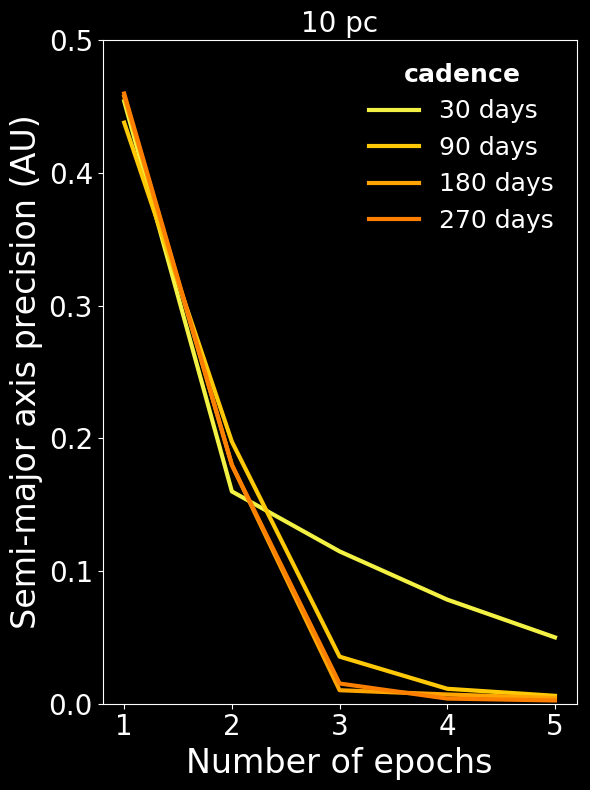

In [6]:
import matplotlib.pyplot as plt

direc=['data/30day_dec10', 'data/90day_dec4', 'data/180day_dec10', 'data/270day_dec10',]
datalabel=['30 days', '90 days', '180 days', '270 days']
# direc=['data/90day_nov17', 'data/uniform_nov17', 'data/uniformtrue_nov17']
# datalabel=['Rayleigh', 'uniform', 'mixed']
cmaps=['Wistia', 'RdPu', 'summer_r', 'pink_r', 'bone_r', 'copper_r']
n_it=[41, 50, 35, 35]
# n_it=[20, 20, 20, 20]
i_hide = [[19, 20, 34], [3, 19], [19, 24], [19, 25, 28, 33]]
idim=0

d=10


ndims=6
n_ep=5

y_data=[]
for ii, val in enumerate(direc):
    n_its = n_it[ii]
    y_data_dims = anal.read_retrievals(val,n_ep, n_its, ndims, d, iter_start=0) # (n_iter, ndims, n_epoch, 3)
    #  read_retrievals(direc, n_ep, n_it, ndims, d)
    y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
    y_data.append(y_data_thisdim)
    
fig, ax = anal.plot_diminishing_returns(y_data, n_ep, n_it, idim,  s=5, d=d, direc=direc,
                                    n_datasets=len(direc),labels=datalabel,cmap=cmaps[idim],
                        alpha=1, showguide=False, iter_start=0,showxlabel=True,
                        ylim=[0, 0.5], read=True,slides=True,
                              legtitle=r"$\bf{cadence}$",
                        i_hide = i_hide,
                        figsize=(6,8),title=str(d)+' pc', 
                        )



plt.tight_layout()
fig.savefig('precision_slides.png', bbox_inches='tight')

reading 1 sigma result from data/30day_dec10
reading 1 sigma result from data/90day_dec4
reading 1 sigma result from data/180day_dec10
reading 1 sigma result from data/270day_dec10
n_iters [41, 50, 35, 35]
i_hide [[19, 20, 34], [3, 19], [19, 24], [19, 25, 28, 33]]
n)uters 41
i_hides [19, 20, 34]
n)uters 50
i_hides [3, 19]
n)uters 35
i_hides [19, 24]
n)uters 35
i_hides [19, 25, 28, 33]


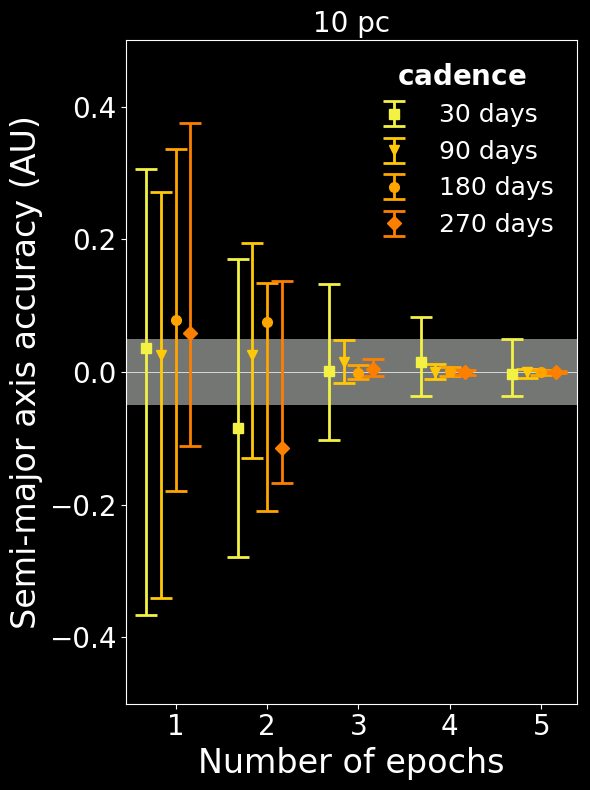

In [2]:
import matplotlib.pyplot as plt
# compare different cadences


direc=['data/30day_dec10', 'data/90day_dec4',  'data/180day_dec10', 'data/270day_dec10']
datalabel=['30 days', '90 days', '180 days', '270 days']

cmaps=['Wistia', 'RdPu', 'summer_r', 'pink_r', 'bone_r', 'copper_r']

idim=0
n_ep=5
n_it=[41, 50, 35, 35]
# n_it=[20, 20, 20, 20]
i_hide = [[19, 20, 34], [3, 19], [19, 24], [19, 25, 28, 33]]


d=10
ndims=6

y_data=[]
for ii, val in enumerate(direc):
    n_it_this = n_it[ii]
    y_data_dims = anal.read_retrievals(val,n_ep, n_it_this, ndims, d, iter_start=0) # (n_iter, ndims, n_epoch, 3)
    #  read_retrievals(direc, n_ep, n_it, ndims, d)
    y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
    y_data.append(y_data_thisdim)

HZ_scale=np.array([0.01, 0.05, 0.1, 0.25, 0.5])
HZ_labels=['1\% HZ', '5\% HZ', '10\% HZ', '25\% HZ', '50\% HZ']
HZ_cmap='rainbow'#'spring'
HZ_inner = -HZ_scale
HZ_outer = HZ_scale 
    
    
# plot 
fig, ax = anal.plot_scatter_epochs(y_data, 5, n_it, idim=idim, truths=None, d=d, direc=direc, 
                                   n_datasets=len(direc),
                                                            fname_base=None, datalabel=datalabel,
                                                            plotIWA=False, slides=True, offset=0.16,
                                                            ylim=[-0.5, 0.5], showxlabel=True,
                             maxprob=False, read=True,
                             i_hide = i_hide,
                               precisionbounds=True,
#                                HZ_inner=HZ_inner, HZ_outer=HZ_outer, HZ_labels=HZ_labels, a_fixed=0,
                                           iter_start=0, alpha=0.8,figsize=(6,8),
                               title=str(d)+' pc',
                                                            cmap=cmaps[idim], legtitle=r"$\bf{cadence}$",
                            
                                                               )
plt.tight_layout()
fig.savefig('acc_slides1.png', bbox_inches='tight')



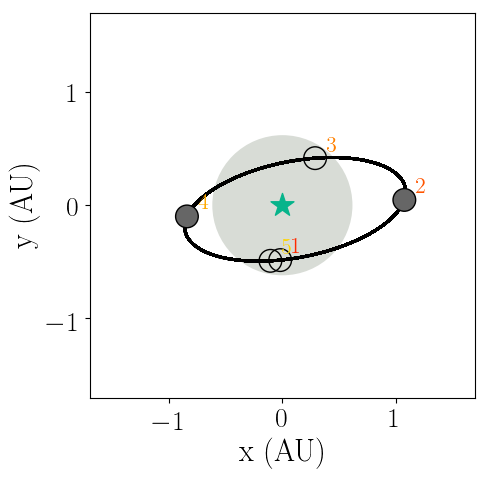

In [30]:
theta = anal.read_truths('data/90day_20pc_dec10')[36]
fig, ax = anal.show_orbit(truths=theta, epochs_to_show=range(5), 
                          cadence=90, d=20, s_mas=5, 
                          showplane=False,#lims=[-3, 3],
                          lims=[-1.7, 1.7],
                           showIWA=True, savefig=False, showaxes=False, cmap='autumn')

# theta = [-0.09903502, -0.33738588,  0.06335528,  1.35537403,  2.89988374,  0.13311615]
# ax = anal.show_orbit(truths=theta, epochs_to_show=range(3), 
#                           cadence=90, d=10, s_mas=5, 
#                           showplane=False,#lims=[-3, 3],
#                           lims=[-1.7, 1.7],# ax=ax,
#                            showIWA=True, savefig=False, showaxes=False, cmap='autumn')

i_ep 2
nsteps 699999
samples 1dim (699999,)
1-sigma half-width in linear-space= 0.0744234506002
truths (0.0, 0.50021561032069961, 0.74553011689528159, 0.75671155267846679, 0.6659903561436088, 1.2759176266814864)
reading unflattened chain
reading 1 sigma result from data/ET_dec13

 overall ML
ML value 13.8088643267 @ 27006950
ML theta [ 0.10719945  0.47165912  0.48045884  1.07603591  0.44572156  1.37006897]

lnprob 12.6217708547
     lnlike 13.0030061967
     lnprior -0.381235342005

other peak
ML value 13.8088643267
flatchain subpeak (20998303, 6)

lnprob 9.41237192408
     lnlike 10.4055707059
     lnprior -0.993198781871
ML theta sub [ 0.09596523  0.45448579  0.60963317  1.03430484  0.39813228  1.4103624 ]

read
ML theta read [ 0.1119741   0.45934103  0.53257092  1.01838617  0.45332606  1.42444216]

lnprob 13.8088643267
     lnlike 14.4183630029
     lnprior -0.609498676268
matches2 [35450115        0]
flatchain[matches2] [[ 0.1119741   0.45934103  0.53257092  1.01838617  0.45332606 

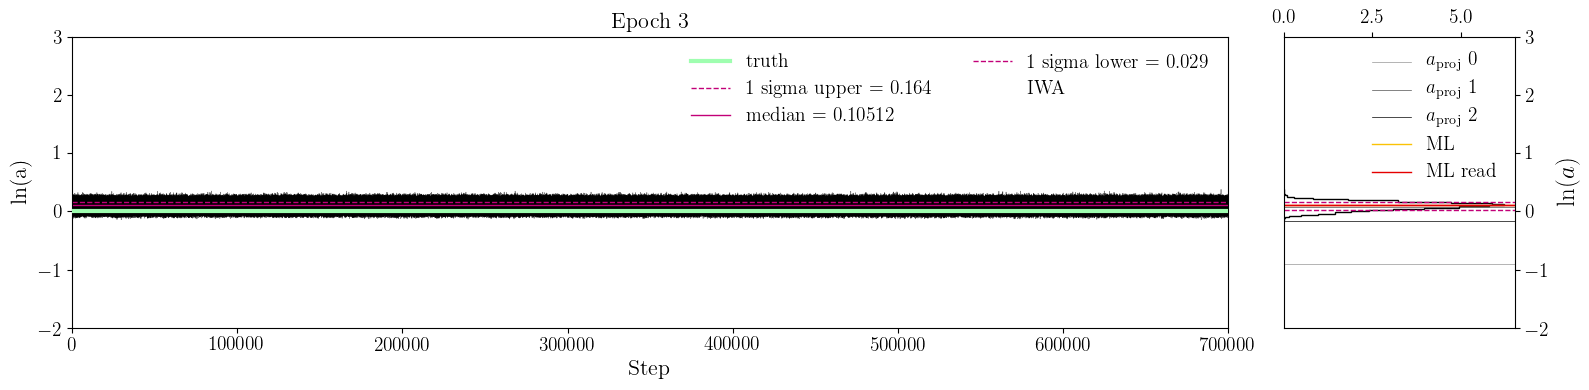

In [44]:
# looking closely at bimodal ML peaks
# try plotting priors wth random draws, histogram this, 

direc='data/ET_dec11'

eps = [2]


i_it = 9
nwalkers=30
d=10
n_ep_tot=5
# steps=slice(0, int(2e4))
# print('analytic 1-sigma width', )

for i_ep in eps:

    fig = plt.figure(figsize=(16, 4)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) # gs = gridspec.GridSpec(1, 2, width_ratios=[7, 1]) 
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    
    if i_ep >= 3:
        k = nwalkers
    else:
        k=2*nwalkers




    fig, ax0 = anal.plot_chain(direc, i_it, i_ep, i_walker=range(k), idim=0, 
                               d=d, showML=False, nwalkers=k,  ylim=[-2, 3],
                               steps=None, showIWA=True, showfit=True,
                               alpha=0.5, lw=0.5,
                               title='Epoch '+str(i_ep+1), fig=fig, ax=ax0,
                              n_ep=1)

    fig, ax1 = anal.plot_chain_dist(direc, i_it, i_ep, d=d, idim=0, n_ep=n_ep_tot, nbins=25, ylim=[-2, 3], 
                                    fig=fig, ax=ax1, showML=True,
                                   showfit=True, cadence=90)
    
    plt.tight_layout()
#     ax0.axhline(y=np.log(0.1))
#     ax0.axhline(y=np.log(50))

#     fig.savefig('chain_dist_beta_3.pdf', bbox_inches='tight')


inc (150,)
prec3 (150,)


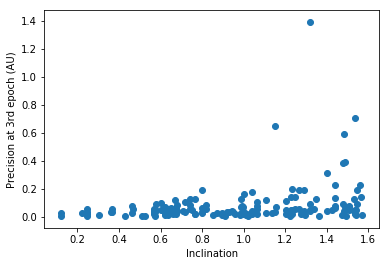

In [2]:
direcs=['data/180day_nov20', 'data/90day_5pc_nov20', 'data/90day_20pc_nov20']
n_it=50
d=10
anal.inclination_v_error(direcs, n_it, d=d)

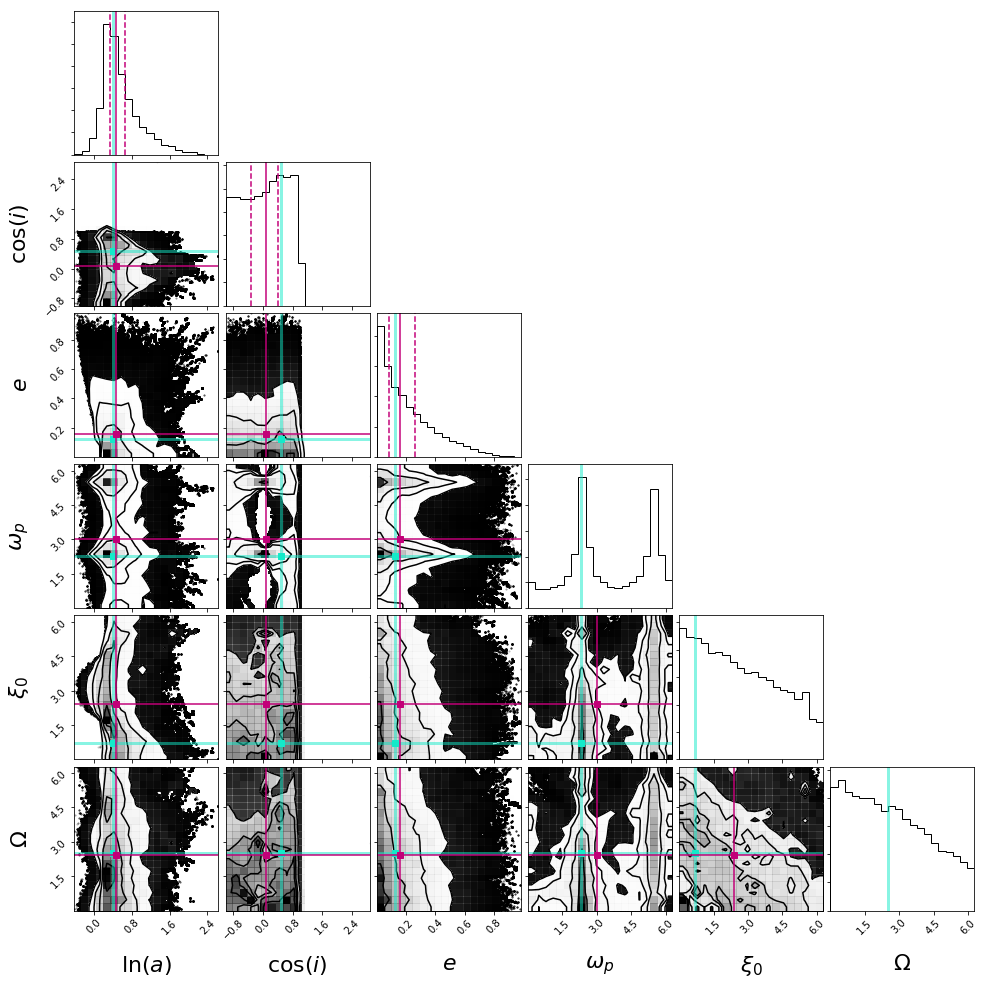

In [2]:
# corner plots epoch 0

direc='data/90day_nov20'
i_it=8


# print uncertainties from each 
anal.plot_corner(direc, d=10, c_truth='xkcd:aqua', c_quants='xkcd:magenta', lw_truth=3,i_epoch=0, i_iter=i_it)


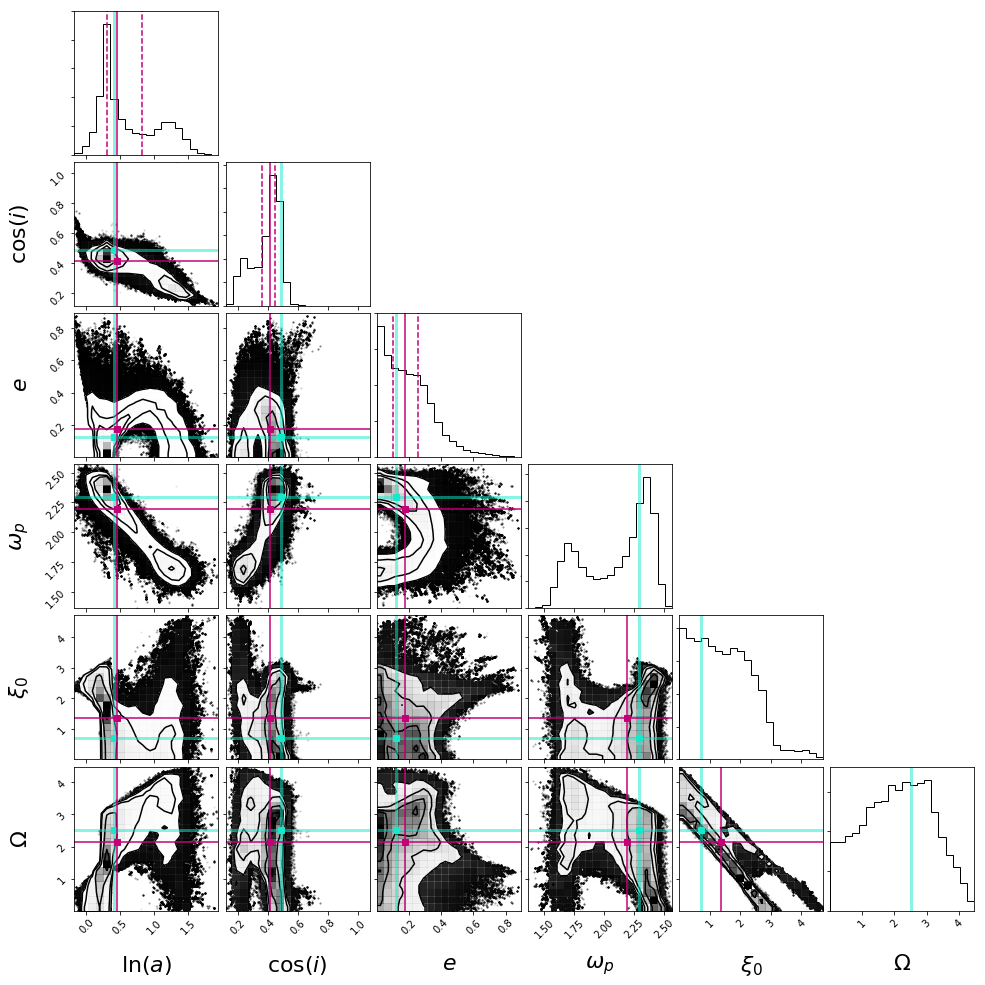

In [3]:
# corner plots epoch 1

direc='data/90day_nov20'
i_it=8


# print uncertainties from each 
anal.plot_corner(direc, d=10, c_truth='xkcd:aqua', c_quants='xkcd:magenta', lw_truth=3,i_epoch=1, i_iter=i_it)


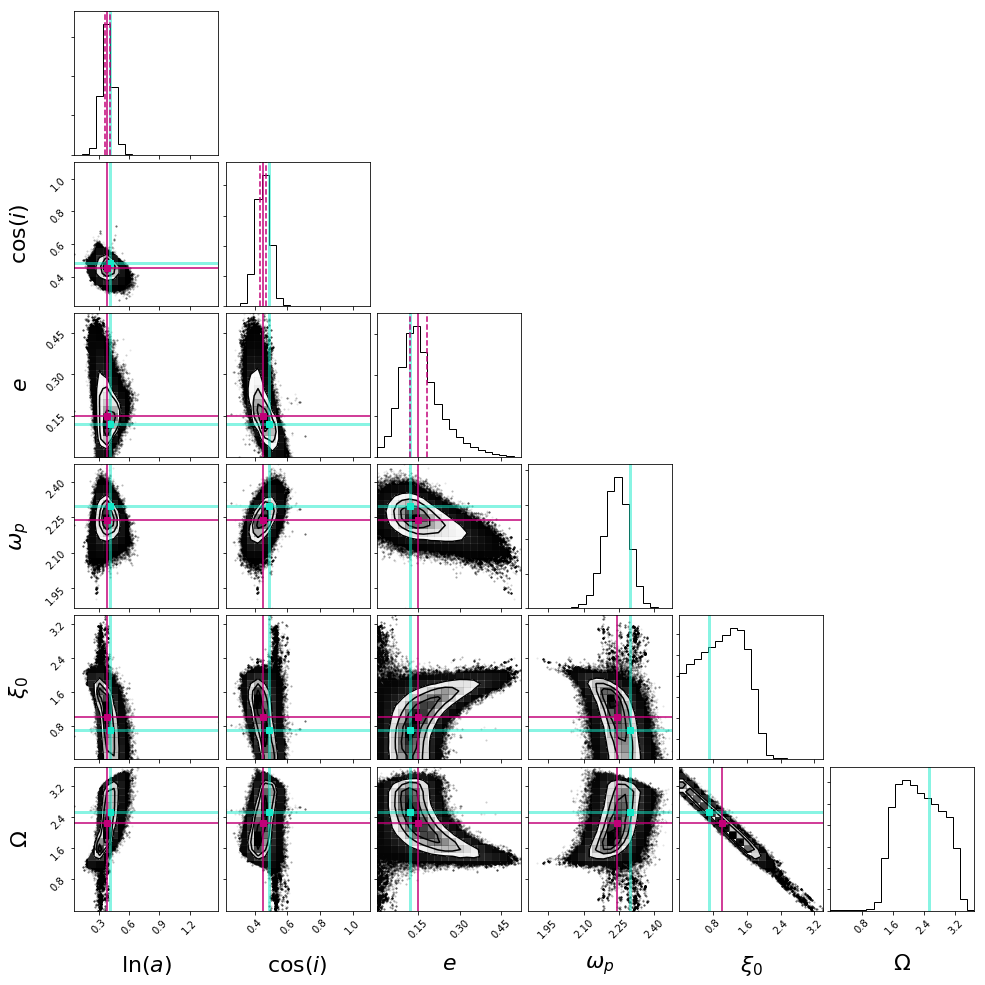

In [4]:
# corner plots epoch 2

direc='data/90day_nov20'
i_it=8


# print uncertainties from each 
anal.plot_corner(direc, d=10, c_truth='xkcd:aqua', c_quants='xkcd:magenta', lw_truth=3,i_epoch=2, i_iter=i_it)


nsteps available: 10000
9224
truths (0.030070256418363847, 0.1556151989335553, 0.044996386944663534, 1.0035526014809972, 2.1758816973035047, 0.76322315218727155)


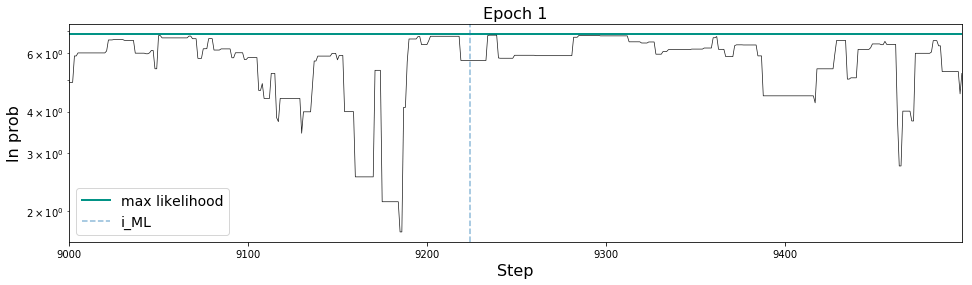

In [4]:
# nmax = int(100*(1e5-50))
steps=slice(9000, 9500)
i_it = 0
i_ep = 0
fig, ax, max_prob = anal.plot_lnprob('data/force3_nov10 (copy)', i_it=i_it, i_walker=18, i_ep=i_ep, idim=0, 
                                     d=10, steps=steps, lw=0.7, alpha=0.9, showML=True,nwalkers=30, nsteps=10000,
                          title='Epoch '+str(i_ep+1))



truths = anal.read_truths('data/test_nov8')[i_it]
print('truths', truths)

Traceback (most recent call last):
  File "/home/claire/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "/home/claire/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/home/claire/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1081, in _start
    self._init_draw()
  File "/home/claire/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1792, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/home/claire/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1814, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<string>", line 124, in animate
  File "<string>", line 329, in show_orbit
UnboundLocalError: local variable 'fig1' referenced before assignment


UnboundLocalError: local variable 'fig1' referenced before assignment

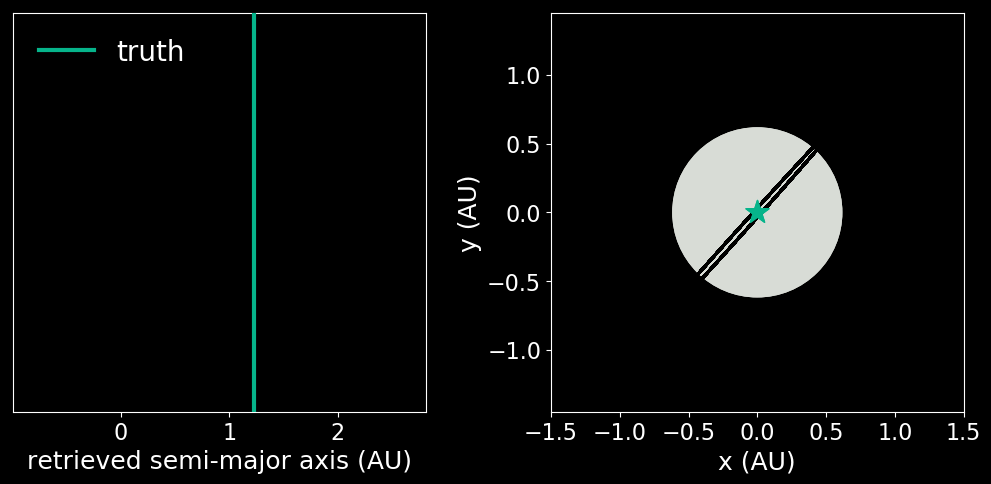

In [39]:
# animate posteriors over epochs 
from IPython.display import HTML
 
    
d=20
direc = 'data/90day_20pc_dec10'
i_iter=9 
idim=0
stem='d20chains_epochs'
n_ep = 5

anim = anal.animatePDFs(direc, idim=idim, i_iter=i_iter, n_ep=n_ep, d=d, ymax=4.3, fname_base=stem,
                        finterval=1000, nbins=25, cadence=90)
HTML(anim.to_jshtml())
# anim.save('hist_epochs.gif', dpi=400, writer='imagemagick', fps=1.1)

In [1]:
direc='data/30day_nov11'
idim=0
n_it=20
cadence=30
d=10
n_epochs=2

anal.get_pix_accuracy(direc, n_it,  idim, d, n_epochs, cadence, maxprob=True, iter_start=0, s=5)

NameError: name 'anal' is not defined

In [16]:
## check likelihoods

from mc_orbit_good import lnprob_Beta, lnlike, lnprior_Beta, obv_at_epoch
# look at likelihoods

direc='data/90day_20pc_dec10'

n_epochs=3
d=20
idim=0
ndims=6
i_iter = 0
cadence = 90

n_iter = i_iter+1

obvs = anal.read_obvs(direc)[i_iter]
x, y, aproj = obvs
i_det = [0, 1, 2]
# i_nondet=[3]
i_nondet=[]
a_IWA = 0.618795
s = 0.1
ndims=6


fname = direc+'/d'+str(d)+'chains_epochs'+str(i_iter)+'_lnprob.dat'
lnprob = anal.read_results(fname)[n_epochs-1]
fname = direc+'/d'+str(d)+'chains_epochs'+str(i_iter)+'.dat'
chains = anal.read_results(fname)[n_epochs-1]
flatchain = chains.reshape((-1, ndims))
flatprob = lnprob.flatten()
max_prob = anal
fname = direc+'/d'+str(d)+'ML'+str(i_iter)+'.dat'
max_prob = anal.read_results(fname)[n_epochs-1]
truths = anal.read_truths(direc)[i_iter]
max_prob[0] = np.log(max_prob[0])
max_prob[1] = np.cos(max_prob[1])

print('saved max_prob',i_iter,'fits', max_prob)
print('\ntrying real max prob')
max_prob = [ 0.01720691,  0.49374824,  0.49736491,  1.92749695,  1.94994147,  1.68795703]
# print('x', x[0:n_epochs+1])

lnprob_val = lnprob_Beta(max_prob, x[0:n_epochs], y[0:n_epochs], aproj[0:n_epochs], s, cadence, n_epochs, i_det, i_nondet, a_IWA)
lnlike_val = lnlike(max_prob, x[0:n_epochs], y[0:n_epochs], aproj[0:n_epochs], s, cadence, n_epochs, i_det, i_nondet, a_IWA)
lnprior_val = lnprior_Beta(max_prob)

lnlike_det = lnlike(max_prob, x[0:n_epochs], y[0:n_epochs], aproj[0:n_epochs], s, cadence, n_epochs, i_det, i_nondet=[], a_IWA=a_IWA)
lnlike_nondet = lnlike(max_prob, x[0:n_epochs], y[0:n_epochs], aproj[0:n_epochs], s, cadence, n_epochs, i_det=[], i_nondet=i_nondet, a_IWA=a_IWA)


# want to check the actual likelihood components of "maximum likelihood"
print('\nlnlike value', lnlike_val)
print('lnprior value', lnprior_val)
print('lnprob value', lnprob_val)
print('lnlike value for det', lnlike_det)
print('lnlike value for nondet', lnlike_nondet)

print('\na_fit=',np.exp(max_prob[0]))
print('a_true=',np.exp(truths[0])).maxlikelihood(flatchain, flatprob)


# actually extract parameters at these indices

i_ML = np.argmax(flatprob)
print('\ni_ML', i_ML)

theta_ML = flatchain[i_ML]

obv_model = obv_at_epoch(theta_ML, n_epochs-1, cadence, noise=False)  

print('obv_model', obv_model)
print('obv', x[n_epochs-1], y[n_epochs-1], aproj[n_epochs-1])

# fig, ax = anal.show_orbit(truths=theta_ML, epochs_to_show=range(n_epochs), cadence=cadence, d=d, s_mas=5, 
#                           showplane=False,
#                showIWA=True, savefig=False, showaxes=False, cmap='autumn')

# fig, ax = anal.show_orbit(truths=theta_ML, epochs_to_show=range(n_epochs), cadence=cadence, d=d, s_mas=5, 
#                           showplane=False,
#                showIWA=True, savefig=False, showaxes=False, cmap='autumn')
# 1.0 1.05439818508 0.0795020044082 0.437757127095 0.824686127843 2.38377973617

saved max_prob 0 fits [ 0.19236653  0.58369877  0.23204814  1.43688803  4.48901496  0.01624776]

trying real max prob

lnlike value 7.89056283633
lnprior value -0.452990428087
lnprob value 7.43757240825
lnlike value for det 7.89056283633
lnlike value for nondet 0.0

a_fit= 1.01735580164
a_true= 1.0

i_ML 1454337
obv_model (-0.23808148514518718, 0.84743616950477008, 0.88024476990996969)
obv -0.242180409584 0.79490686789 0.830980312285


In [5]:
direc='data/180day_nov11'
idim=0
n_it=20
cadence=180
d=10

n_epochs=2

# meanx, meany = anal.get_xy_accuracy(direc, n_it,  idim, d, cadence, n_epochs, maxprob=True, iter_start=0, s=5)
# print(meanx, meany)
i_ep = n_epochs-1
anal.get_trueseparation_accuracy(direc, n_it, i_ep, idim, d, n_epochs, cadence)


0.092855392877221749

reading 1 sigma result from data/30day_dec10
reading 1 sigma result from data/90day_dec4
reading 1 sigma result from data/180day_dec10
reading 1 sigma result from data/270day_dec10
d 10


(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

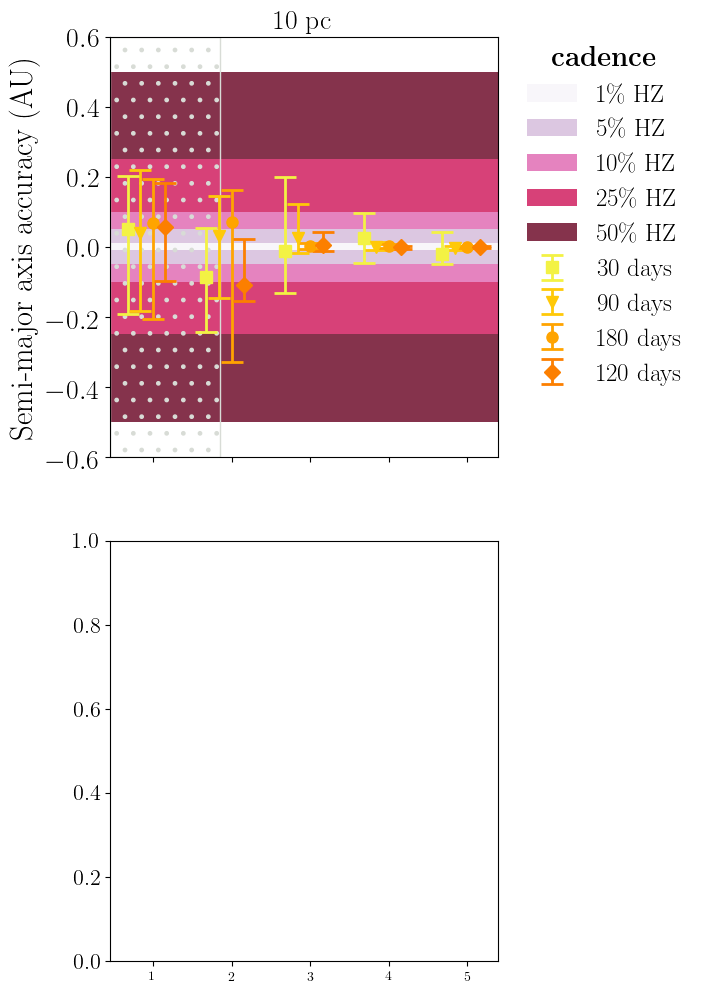

In [109]:
import matplotlib.pyplot as plt
# compare different cadences
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(5 ,12))
# ax1 = fig.add_subplot(221)


# direc=['data/30day_nov11', 'data/90day_nov11', 'data/120day_nov11', 'data/180day_nov11']
# datalabel=['30 days', '90 days', '120 days', '180 days']
direc=['data/30day_dec10', 'data/90day_dec4',  'data/180day_dec10', 'data/270day_dec10']
datalabel=['30 days', '90 days', '180 days', '120 days']

cmaps=['Wistia', 'RdPu', 'summer_r', 'pink_r', 'bone_r', 'copper_r']
n_it=20
idim=0
n_ep=5

d=10
ndims=6

y_data=[]
for ii, val in enumerate(direc):
    y_data_dims = anal.read_retrievals(val,n_ep, n_it, ndims, d, iter_start=0) # (n_iter, ndims, n_epoch, 3)
    #  read_retrievals(direc, n_ep, n_it, ndims, d)
    y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
    y_data.append(y_data_thisdim)

HZ_scale=np.array([0.01, 0.05, 0.1, 0.25, 0.5])
HZ_labels=['1\% HZ', '5\% HZ', '10\% HZ', '25\% HZ', '50\% HZ']
HZ_cmap='rainbow'#'spring'
HZ_inner = -HZ_scale
HZ_outer = HZ_scale 
    
    
# plot 
_ = anal.plot_scatter_epochs(y_data, 5, n_it, idim=idim, truths=None, d=d, direc=direc, n_datasets=len(direc),
                                                            fname_base=None, datalabel=datalabel,
                                                            plotIWA=False, slides=False, offset=0.16,
                                                            ylim=[-0.6, 0.6], showxlabel=False,
                             maxprob=True, read=True,
#                              i_hide = [14],
#                                precisionbounds=True,
                               HZ_inner=HZ_inner, HZ_outer=HZ_outer, HZ_labels=HZ_labels, a_fixed=0,
                                           iter_start=0, alpha=0.8,figsize=(5,8),
                               title=str(d)+' pc',
                                                            cmap=cmaps[idim], legtitle=r"$\bf{cadence}$",
                             ax = axs[0]
                                                               )

# fig.savefig('x-cadences'+str(idim)+'.pdf', bbox_inches='tight', transparent=True)
plt.yticks(fontsize=16)

## # add second subplot
# idim=1

# y_data=[]
# for ii, val in enumerate(direc):
#     y_data_dims = anal.read_retrievals(val,n_ep, n_it, ndims, d, iter_start=0) # (n_iter, ndims, n_epoch, 3)
#     #  read_retrievals(direc, n_ep, n_it, ndims, d)
#     y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
#     y_data.append(y_data_thisdim)
    
# # plot 
# _ = anal.plot_scatter_epochs(y_data, 5, n_it, idim=idim, d=d,
#                              truths=None, direc=direc, n_datasets=len(direc),
#                             fname_base=None, datalabel=datalabel,
#                             plotIWA=False, slides=False, offset=0.16,
#                             ylim=[-0.6, 0.6], 
# #                              i_hide = [14],
# #                                precisionbounds=True,
# #                                HZ_inner=HZ_inner, HZ_outer=HZ_outer, HZ_labels=HZ_labels, a_fixed=1,
#                                 iter_start=0, alpha=0.8,figsize=(5,8),maxprob=True,
# #                                title='10 pc',
#                             cmap=cmaps[idim], legtitle=r"$\bf{cadence}$",
#                              ax = axs[1]
#                                                                )


# axs[1].set_ylim(-0.6, 1.6)
# plt.tight_layout()
# # fig.savefig('accuracy_grid.pdf', bbox_inches='tight')


reading 1 sigma result from data/30day_dec10
reading 1 sigma result from data/90day_dec4
reading 1 sigma result from data/180day_dec10
reading 1 sigma result from data/270day_dec10
reading 1 sigma result from data/30day_dec10
reading 1 sigma result from data/90day_dec4
reading 1 sigma result from data/180day_dec10
reading 1 sigma result from data/270day_dec10


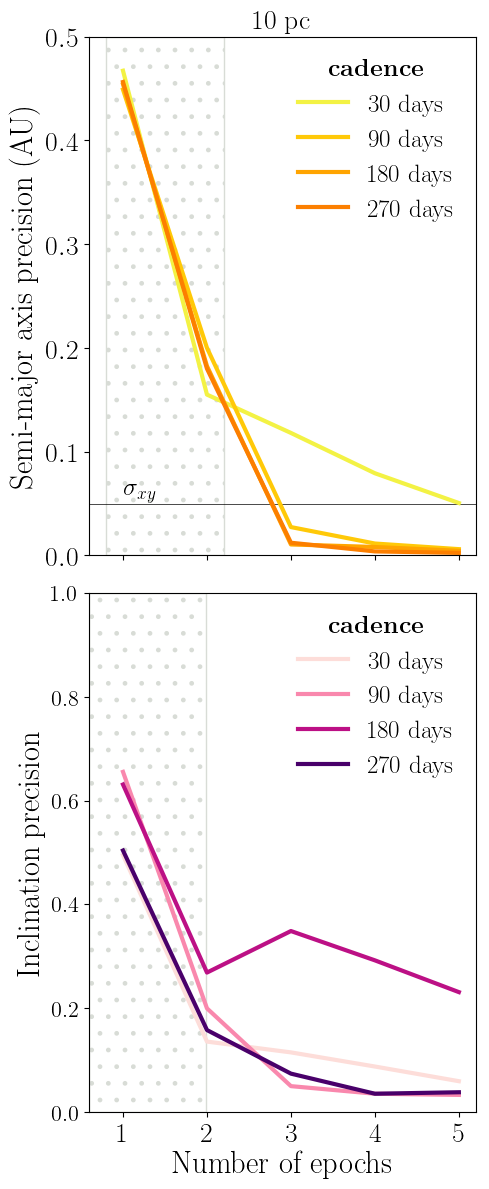

In [110]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(5,12))

direc=['data/30day_dec10', 'data/90day_dec4', 'data/180day_dec10', 'data/270day_dec10',]
datalabel=['30 days', '90 days', '180 days', '270 days']
# direc=['data/90day_nov17', 'data/uniform_nov17', 'data/uniformtrue_nov17']
# datalabel=['Rayleigh', 'uniform', 'mixed']
cmaps=['Wistia', 'RdPu', 'summer_r', 'pink_r', 'bone_r', 'copper_r']
n_it=20
idim=0

d=10


ndims=6
n_ep=5

y_data=[]
for ii, val in enumerate(direc):
    y_data_dims = anal.read_retrievals(val,n_ep, n_it, ndims, d, iter_start=0) # (n_iter, ndims, n_epoch, 3)
    #  read_retrievals(direc, n_ep, n_it, ndims, d)
    y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
    y_data.append(y_data_thisdim)
    
anal.plot_diminishing_returns(y_data, n_ep, n_it, idim,  s=5, d=d, direc=direc,
                                    n_datasets=len(direc),labels=datalabel,cmap=cmaps[idim],
                        alpha=1, showguide=False, iter_start=0,showxlabel=False,
                        ylim=[0, 0.5], read=True,
                              legtitle=r"$\bf{cadence}$",
                        i_hide = [],
                        figsize=(5,8),title=str(d)+' pc', ax=axs[0]
                        )


idim=1
y_data=[]
for ii, val in enumerate(direc):
    y_data_dims = anal.read_retrievals(val,n_ep, n_it, ndims, d, iter_start=0) # (n_iter, ndims, n_epoch, 3)
    #  read_retrievals(direc, n_ep, n_it, ndims, d)
    y_data_thisdim = np.swapaxes(y_data_dims, 0, 1)[idim]
    y_data.append(y_data_thisdim)
    
anal.plot_diminishing_returns(y_data, n_ep, n_it, idim,  s=5, d=d, direc=direc,
                                    n_datasets=len(direc),labels=datalabel,cmap=cmaps[idim],
                        alpha=1, showguide=False, iter_start=0,
                        ylim=[0, 1], 
                              legtitle=r"$\bf{cadence}$",
                      i_hide = [],
                        figsize=(5,8),#title=str(d)+' pc', 
                              ax=axs[1]
                        )

plt.yticks(fontsize=16)
plt.tight_layout()
# fig.savefig('precision_grid.pdf', bbox_inches='tight')